In [1]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from librosa.display import specshow
from IPython.display import Audio

warnings.filterwarnings('ignore')


C:\Users\anilk\AppData\Local\Temp\ipykernel_1584\3985938783.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
directory_path = 'C:/Users/anilk/jup/speech/input' 
paths = []
labels = []
for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        if len(paths) == 2800:
            break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
paths

['C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_beg_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bite_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_boat_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bone_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS

In [4]:
paths[:5]


['C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:/Users/anilk/jup/speech/input\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [5]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [6]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:/Users/anilk/jup/speech/input\TESS Toronto e...,angry
1,C:/Users/anilk/jup/speech/input\TESS Toronto e...,angry
2,C:/Users/anilk/jup/speech/input\TESS Toronto e...,angry
3,C:/Users/anilk/jup/speech/input\TESS Toronto e...,angry
4,C:/Users/anilk/jup/speech/input\TESS Toronto e...,angry


In [7]:
df['label'].value_counts()


label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

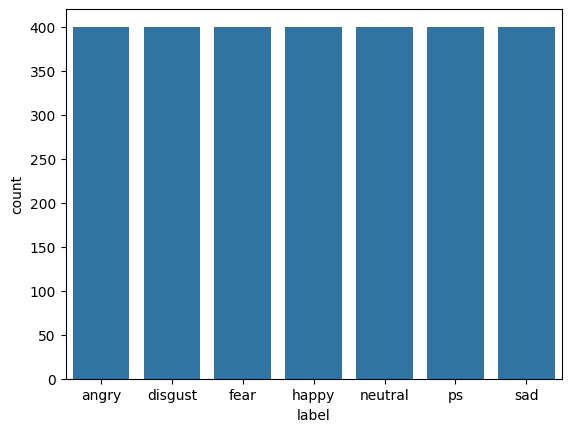

In [8]:
sns.countplot(data=df, x='label')


In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

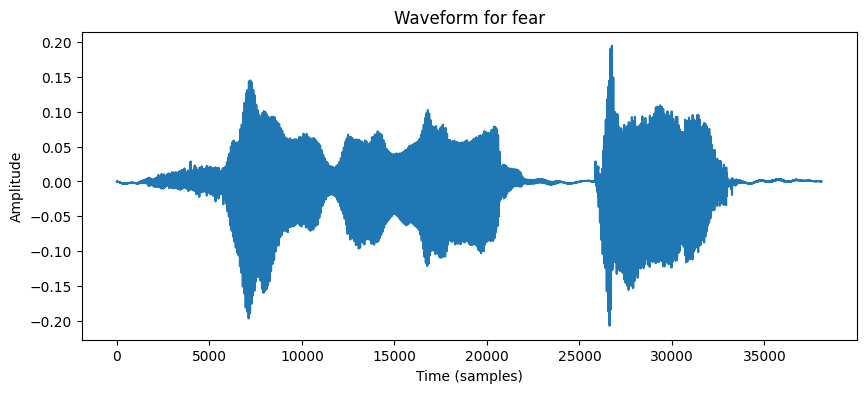

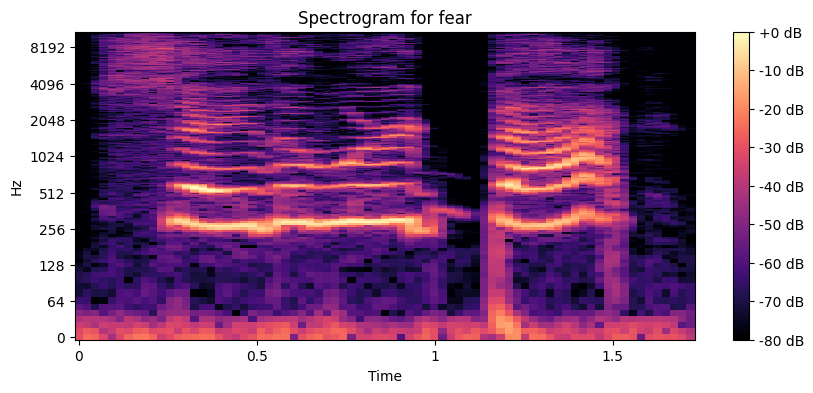

In [10]:

emotion = 'fear'  
path = np.array(df['speech'][df['label'] == emotion])[0]  

data, sampling_rate = librosa.load(path)
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Waveform for ' + emotion)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()


plt.figure(figsize=(10, 4))
specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for ' + emotion)
plt.show()

Audio(path)


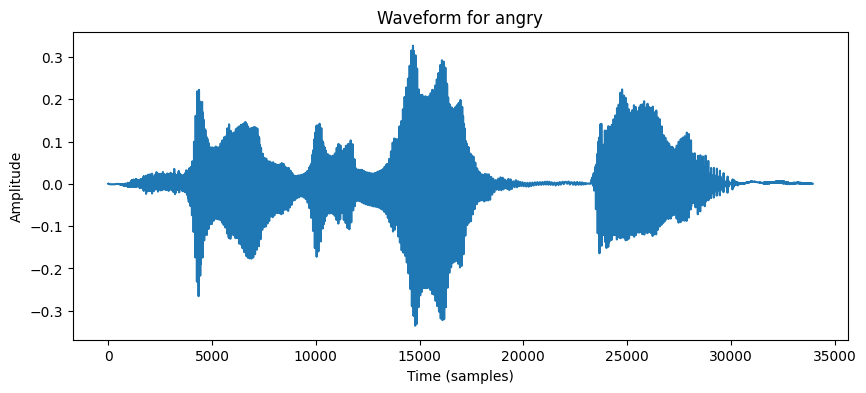

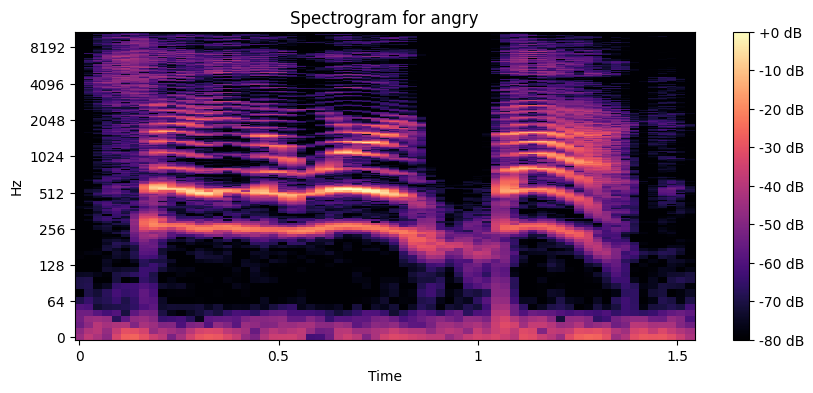

In [11]:

emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]  

data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Waveform for ' + emotion)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for ' + emotion)
plt.show()

Audio(path)


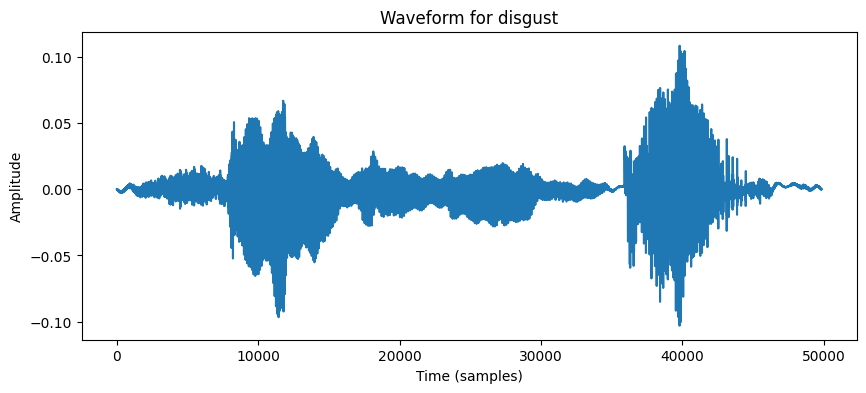

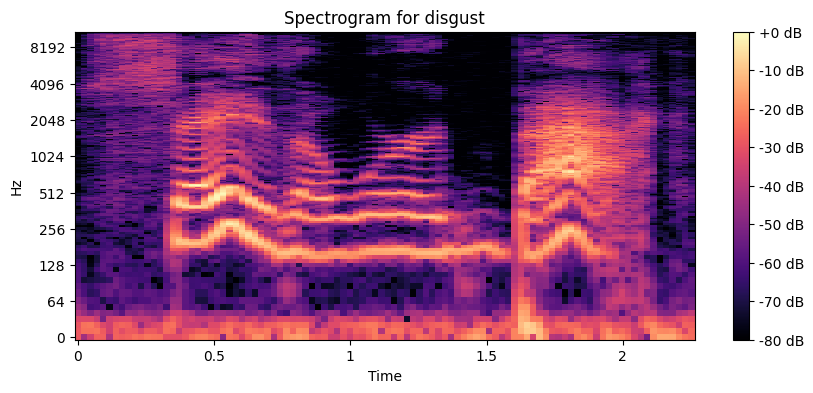

In [12]:

emotion = 'disgust'  
path = np.array(df['speech'][df['label'] == emotion])[0] 

data, sampling_rate = librosa.load(path)
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Waveform for ' + emotion)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for ' + emotion)
plt.show()

Audio(path)


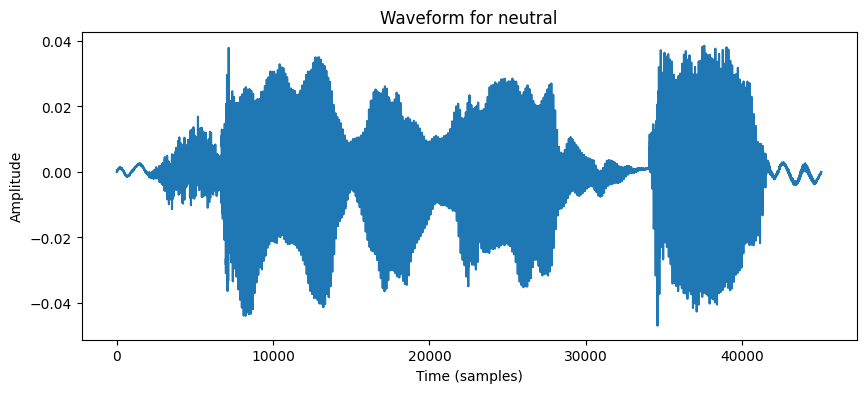

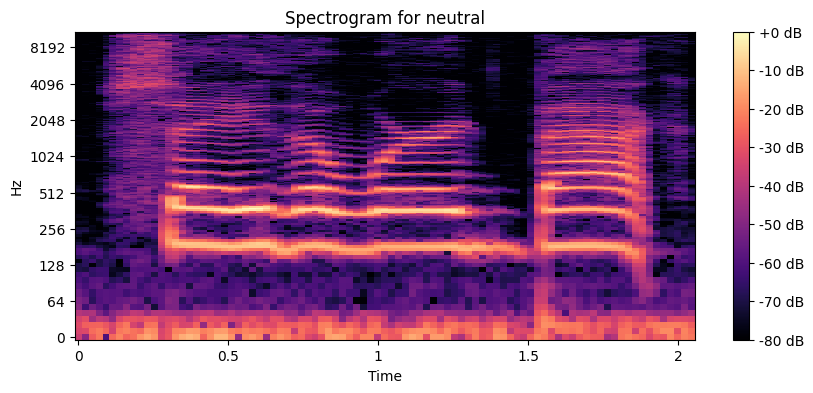

In [13]:

emotion = 'neutral'  
path = np.array(df['speech'][df['label'] == emotion])[0]  

data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Waveform for ' + emotion)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for ' + emotion)
plt.show()

Audio(path)


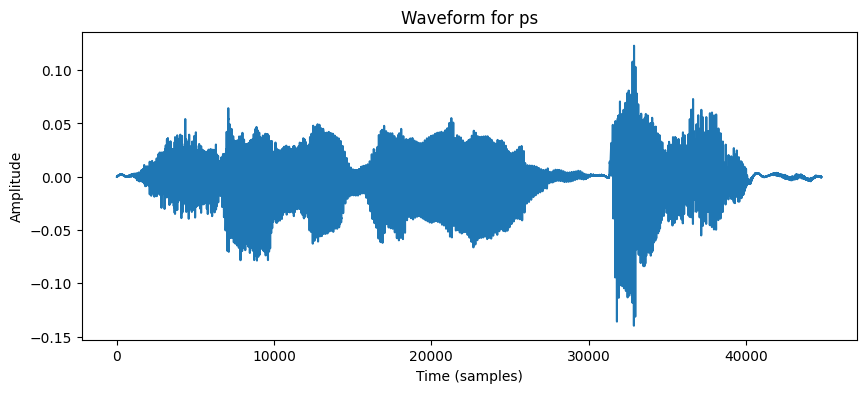

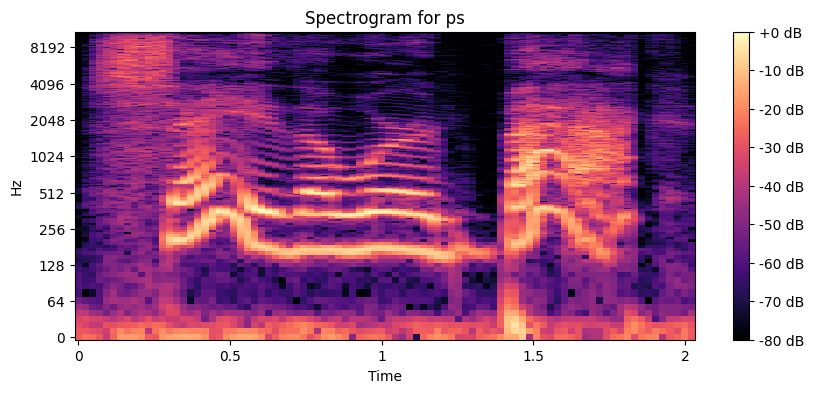

In [14]:

emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]  

data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Waveform for ' + emotion)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for ' + emotion)
plt.show()

Audio(path)


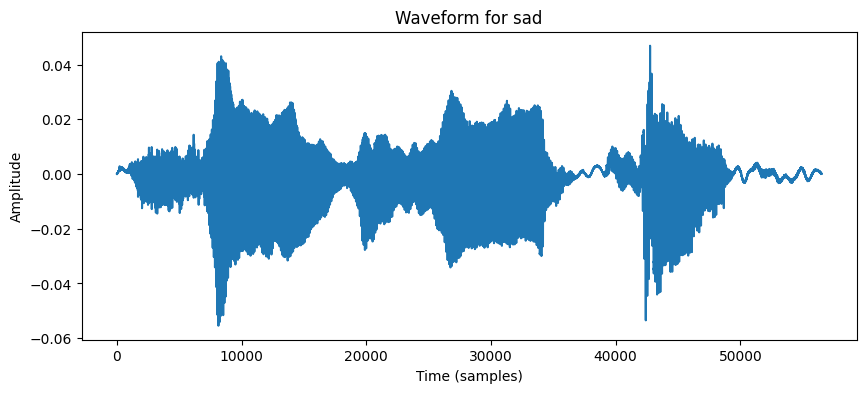

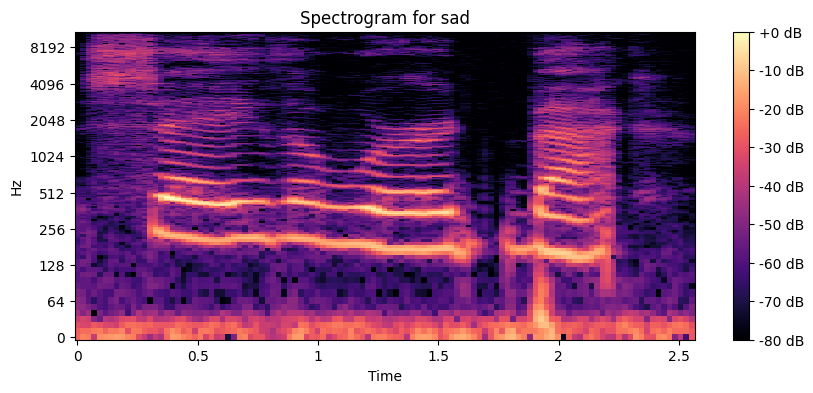

In [15]:

emotion = 'sad' 
path = np.array(df['speech'][df['label'] == emotion])[0]  
data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Waveform for ' + emotion)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for ' + emotion)
plt.show()

Audio(path)


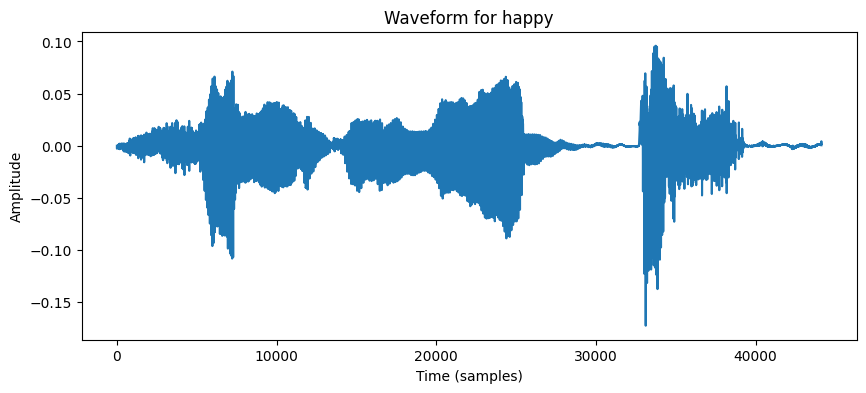

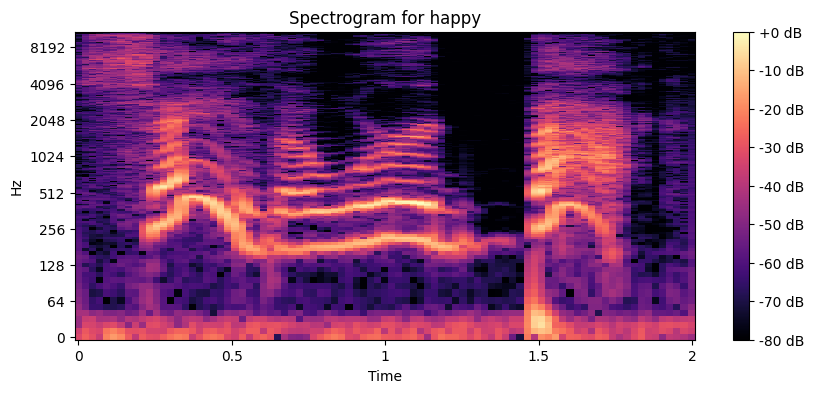

In [16]:

emotion = 'happy'  
path = np.array(df['speech'][df['label'] == emotion])[0]  

data, sampling_rate = librosa.load(path)

plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Waveform for ' + emotion)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()
plt.figure(figsize=(10, 4))
specshow(librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max), sr=sampling_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for ' + emotion)
plt.show()

Audio(path)


In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666927e+01,
       -2.11275601e+00,  1.00753632e+01, -2.03667068e+01, -6.09245014e+00,
       -7.21228313e+00, -5.57366252e-01, -1.83255339e+00,  2.02101290e-01,
        7.27551103e-01,  1.31773746e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688060e+00, -7.03765249e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169914e+01,  2.03489285e+01,
        1.34133663e+01,  8.33917141e+00,  3.94721955e-01,  5.11131477e+00,
        9.56873989e+00,  5.45486879e+00,  2.50996351e+00, -1.82390761e+00,
        4.86896229e+00,  9.31392384e+00,  2.08914995e+00, -1.90649140e+00],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))


In [20]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666693, -...
1       [-465.73267, 98.77373, 0.65600806, -32.74544, ...
2       [-429.79196, 46.12401, 1.5550473, -0.21709459,...
3       [-403.46118, 76.32369, -12.531776, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54756, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [21]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [22]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()


In [25]:
y.shape


(2800, 7)

In [26]:
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)


Keras version: 3.2.0
TensorFlow version: 2.16.1


In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - accuracy: 0.4044 - loss: 1.5151 - val_accuracy: 0.3482 - val_loss: 2.3695
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.8089 - loss: 0.5212 - val_accuracy: 0.5286 - val_loss: 1.3003
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.9171 - loss: 0.2564 - val_accuracy: 0.4982 - val_loss: 2.1065
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.9456 - loss: 0.1785 - val_accuracy: 0.5018 - val_loss: 2.0508
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 160ms/step - accuracy: 0.9395 - loss: 0.2020 - val_accuracy: 0.6143 - val_loss: 2.0115
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.9594 - loss: 0.1544 - val_accuracy: 0.4393 - val_loss: 2.1854
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.9767 - loss: 0.0894 - val_accuracy: 0.4571 - val_loss: 2.2319
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.9635 - loss: 0.1263 - val_accuracy: 0

In [29]:

model.save('modelspechh.keras')


from keras.models import load_model
loaded_model = load_model('modelspechh.keras')


In [30]:

import librosa
import numpy as np
from keras.models import load_model

def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

def map_label_to_emotion(label):
    
    mapping = {
        0: 'angry',
        1: 'disgust',
        2: 'fear',
        3: 'happy',
        4: 'neutral',
        5: 'ps',
        6: 'sad'
    }
    return mapping[label]


model = load_model('modelspechh.keras')

input_audio_path = 'C:/Users/anilk/jup/ml speech/OAF_back_angry.wav'

input_features = extract_mfcc(input_audio_path)

input_features = np.expand_dims(input_features, axis=0)
input_features = np.expand_dims(input_features, axis=-1)

prediction = model.predict(input_features)

predicted_label = np.argmax(prediction)

predicted_emotion = map_label_to_emotion(predicted_label)

print("Predicted Emotion:", predicted_emotion)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
Predicted Emotion: angry
